docker run -p 8888:8888 -p 6006:6006 -v /c/Users/Elvis/Dropbox/CAS_Statistical_Modelling/Musik/:/notebooks/ -it oduerr/tf_docker:tf1_py3


In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.4/dist-packages


In [2]:
!pip install librosa

    100% |################################| 1.5MB 623kB/s ta 0:00:01    64% |####################            | 983kB 3.0MB/s eta 0:00:01    81% |##########################      | 1.2MB 2.2MB/s eta 0:00:01
    100% |################################| 184kB 2.0MB/s ta 0:00:01
    100% |################################| 450kB 1.7MB/s ta 0:00:01
    100% |################################| 7.9MB 133kB/s ta 0:00:011   43% |#############                   | 3.5MB 6.2MB/s eta 0:00:01    50% |################                | 4.0MB 4.1MB/s eta 0:00:01    61% |###################             | 4.9MB 2.6MB/s eta 0:00:02    70% |######################          | 5.6MB 2.8MB/s eta 0:00:01    75% |########################        | 6.0MB 6.7MB/s eta 0:00:01    81% |#########################       | 6.4MB 1.6MB/s eta 0:00:01    92% |#############################   | 7.4MB 4.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for librosa ... - \ done
  Stored in directory: /root/.cache/pip/wheels/7a/bf

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import IPython.display

import librosa
import librosa.display

In [4]:
!apt-get update

Ign http://archive.ubuntu.com trusty InRelease
Get:1 http://archive.ubuntu.com trusty-updates InRelease [65.9 kB]
Get:2 http://archive.ubuntu.com trusty-security InRelease [65.9 kB]
Get:3 http://archive.ubuntu.com trusty Release.gpg [933 B]
Get:4 http://archive.ubuntu.com trusty Release [58.5 kB]
Get:5 http://archive.ubuntu.com trusty-updates/main Sources [499 kB]
Get:6 http://archive.ubuntu.com trusty-updates/restricted Sources [6470 B]
Get:7 http://archive.ubuntu.com trusty-updates/universe Sources [238 kB]
Get:8 http://archive.ubuntu.com trusty-updates/main amd64 Packages [1268 kB]
Get:9 http://archive.ubuntu.com trusty-updates/restricted amd64 Packages [21.2 kB]
Get:10 http://archive.ubuntu.com trusty-updates/universe amd64 Packages [548 kB]
Get:11 http://archive.ubuntu.com trusty-security/main Sources [179 kB]         
Get:12 http://archive.ubuntu.com trusty-security/restricted Sources [5068 B]   
Get:13 http://archive.ubuntu.com trusty-security/universe Sources [74.7 kB]    
Get:

In [5]:
!apt-get install -y libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  libasound2 libasound2-data libasyncns0 libavcodec54 libavdevice53
  libavfilter3 libavformat54 libavresample1 libavutil52 libcaca0 libcdio-cdda1
  libcdio-paranoia1 libcdio13 libdc1394-22 libflac8 libgsm1 libjack-jackd2-0
  libmp3lame0 libogg0 libopenjpeg2 libopus0 liborc-0.4-0 libpulse0
  libraw1394-11 libsamplerate0 libschroedinger-1.0-0 libsdl1.2debian
  libsndfile1 libspeex1 libswscale2 libtheora0 libusb-1.0-0 libva1 libvorbis0a
  libvorbisenc2 libvpx1 libwrap0 libx264-142 libxfixes3 libxvidcore4 tcpd
Suggested packages:
  libasound2-plugins alsa-utils frei0r-plugins jackd2 opus-tools pulseaudio
  libraw1394-doc speex
The following NEW packages will be installed:
  libasound2 libasound2-data libasyncns0 libav-tools libavcodec54
  libavdevice53 libavfilter3 libavformat54 libavresample1 libavutil52 libcaca0
  libcdio-cdda1 libcdio-paranoia1

In [6]:
!apt-get install -y python-audioread

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  libmad0 libpython-stdlib libpython2.7-minimal libpython2.7-stdlib python
  python-minimal python-pymad python2.7 python2.7-minimal
Suggested packages:
  python-doc python-tk python2.7-doc binfmt-support
The following NEW packages will be installed:
  libmad0 libpython-stdlib libpython2.7-minimal libpython2.7-stdlib python
  python-audioread python-minimal python-pymad python2.7 python2.7-minimal
0 upgraded, 10 newly installed, 0 to remove and 66 not upgraded.
Need to get 3832 kB of archives.
After this operation, 16.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/universe libmad0 amd64 0.15.1b-8ubuntu1 [71.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty-updates/main libpython2.7-minimal amd64 2.7.6-8ubuntu0.3 [307 kB]
Get:3 http://archive.ubuntu.com/ubuntu/ trusty-updates/main python2.7-minimal 

/notebooks/Song_Bilder


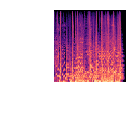

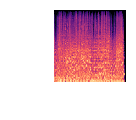

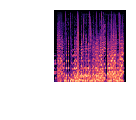

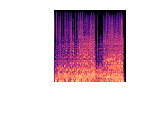

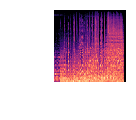

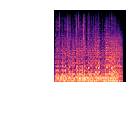

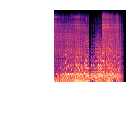

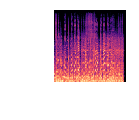

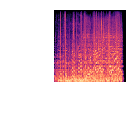

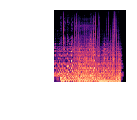

In [7]:
%cd /notebooks/Song_Bilder/

import glob
Songs= glob.glob("/notebooks/Radiohead - In Rainbows (2007) 320kbps/*.mp3")

import os 
Song_names=os.listdir("/notebooks/Radiohead - In Rainbows (2007) 320kbps/")

for i in range(0,len(Song_names)):
   Song_names[i]= Song_names[i].replace(".mp3","")

for i in range(0,len(Songs)):
    y, sr = librosa.load(Songs[i],sr=22050*2)
    S = librosa.feature.melspectrogram(y, sr=22050*2, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)
    width=224
    height=224
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.savefig(Song_names[i]+".png",dpi=height)

/notebooks/Song_Bilder


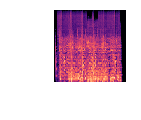

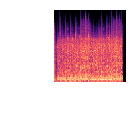

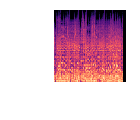

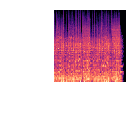

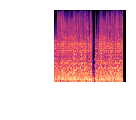

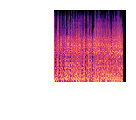

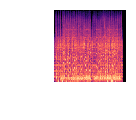

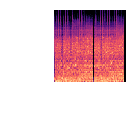

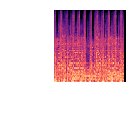

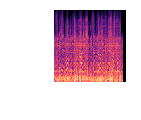

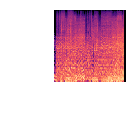

In [8]:
%cd /notebooks/Song_Bilder/

import glob
Songs= glob.glob("/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/*.mp3")

import os 
Song_names=os.listdir("/notebooks/The_Strokes_Discography/The_Strokes_Is_This_It/")

for i in range(0,len(Song_names)):
   Song_names[i]= Song_names[i].replace(".mp3","")

for i in range(0,len(Songs)):
    y, sr = librosa.load(Songs[i],sr=22050*2)
    S = librosa.feature.melspectrogram(y, sr=22050*2, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)
    width=224
    height=224
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.savefig(Song_names[i]+".png",dpi=height)

/notebooks/Song_Bilder


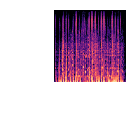

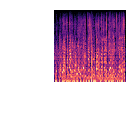

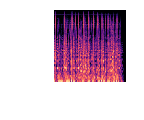

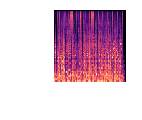

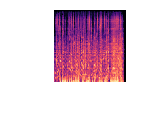

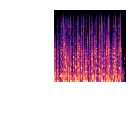

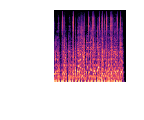

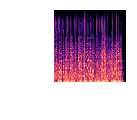

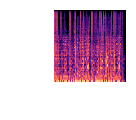

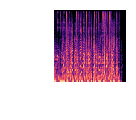

In [9]:
%cd /notebooks/Song_Bilder/

import glob
Songs= glob.glob("/notebooks/Bob Marley & The Wailers - Exodus/*.mp3")

import os 
Song_names=os.listdir("/notebooks/Bob Marley & The Wailers - Exodus/")

for i in range(0,len(Song_names)):
   Song_names[i]= Song_names[i].replace(".mp3","")

for i in range(0,len(Songs)):
    y, sr = librosa.load(Songs[i],sr=22050*2)
    S = librosa.feature.melspectrogram(y, sr=22050*2, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)
    width=224
    height=224
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.savefig(Song_names[i]+".png",dpi=height)